In [1]:
#for eda

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install import_ipynb

In [4]:
cd /content/drive/MyDrive/Colab Notebooks/Fork/BISTelligence

/content/drive/MyDrive/Colab Notebooks/Fork/BISTelligence


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler,RobustScaler
import import_ipynb
import data.preprocessing as dp

importing Jupyter notebook from /content/drive/MyDrive/Colab Notebooks/Fork/BISTelligence/data/preprocessing.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data = dp.GetData()
preprocessed_data = dp.PreprocessingData()
scaled_train_data, scaled_test_data = dp.ScaledData()
nonscaled_train_data, nonscaled_test_data = dp.NonScaledData()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key              1764 non-null   int64  
 1   Pressure         1764 non-null   float64
 2   Power1           1764 non-null   float64
 3   Power2           1764 non-null   float64
 4   Vibration_Peak1  1764 non-null   float64
 5   Vibration_RMS1   1764 non-null   float64
 6   Vibration_Peak2  1764 non-null   float64
 7   Vibration_RMS2   1764 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 110.4 KB


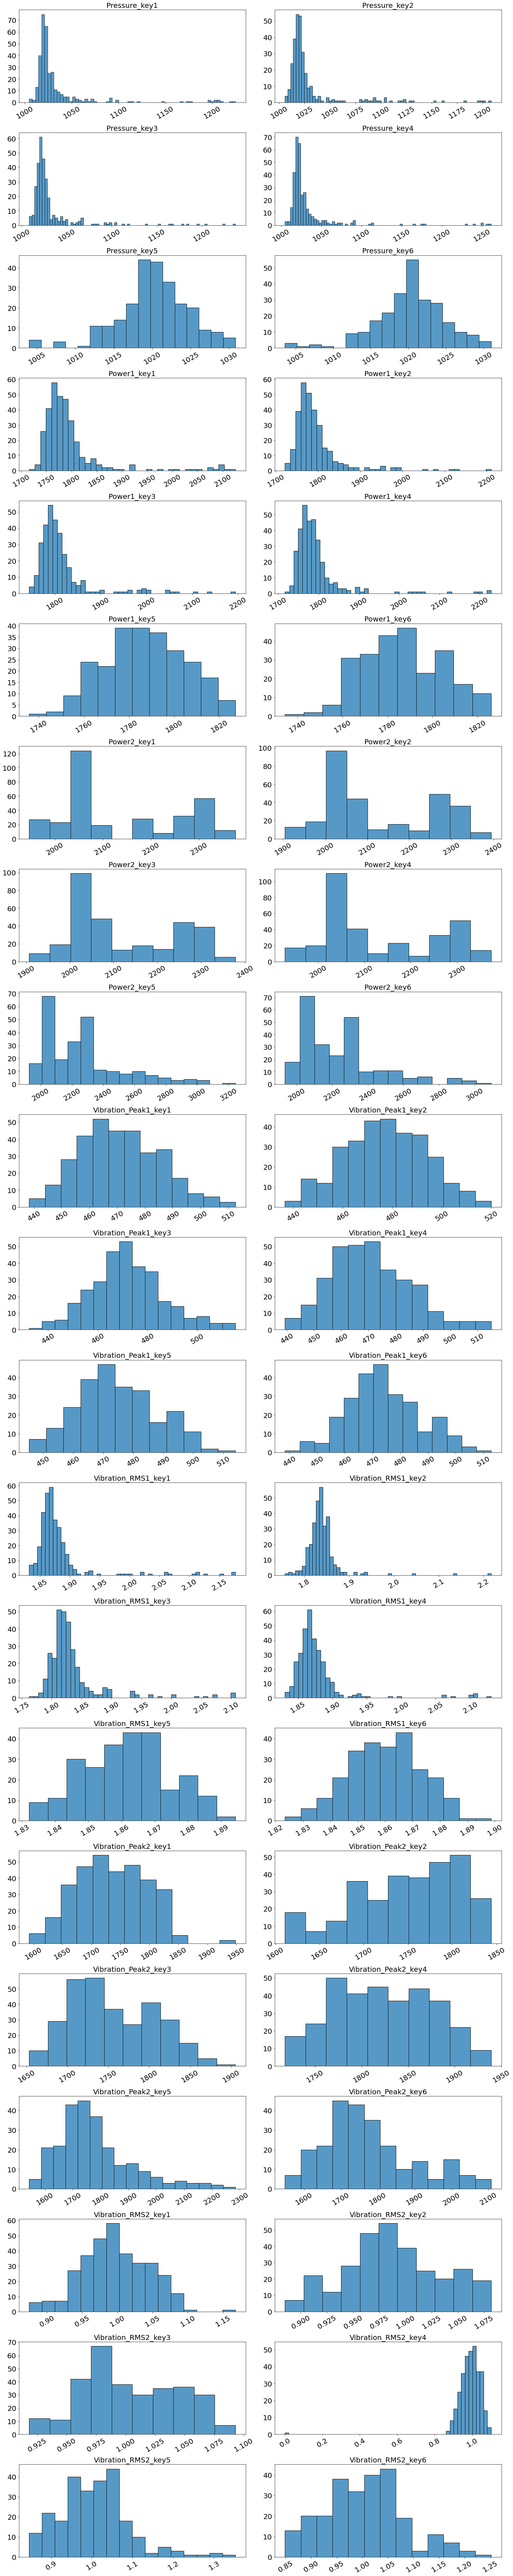

In [8]:
fig = plt.figure(figsize=(20,100))
area = []
i=0
for col in data.columns:
    if(col=='key'):
        continue
    for num in range(1,7):
        key_data = data[data['key']==num]
        area.append(fig.add_subplot(21,2,i+1))
        sns.histplot(x=key_data[col], ax=area[i])
        title = ''.join([col,'_key'+str(num)])
        plt.title(title, fontsize = 20)
        plt.xticks(rotation=30,fontsize=20)
        plt.yticks(fontsize=20)
        plt.xlabel('')
        plt.ylabel('')
        plt.tight_layout()
        i+=1

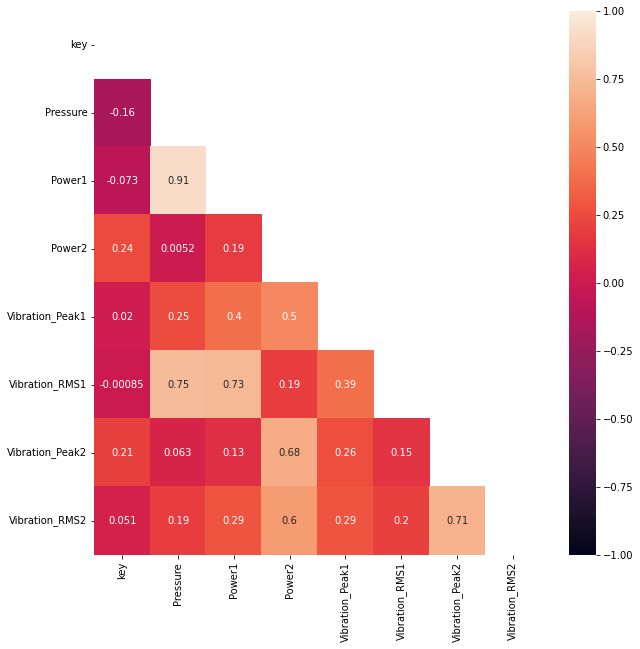

In [9]:
mask=np.zeros_like(data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(data.corr(), vmin=-1, vmax=1,annot=True,mask=mask)

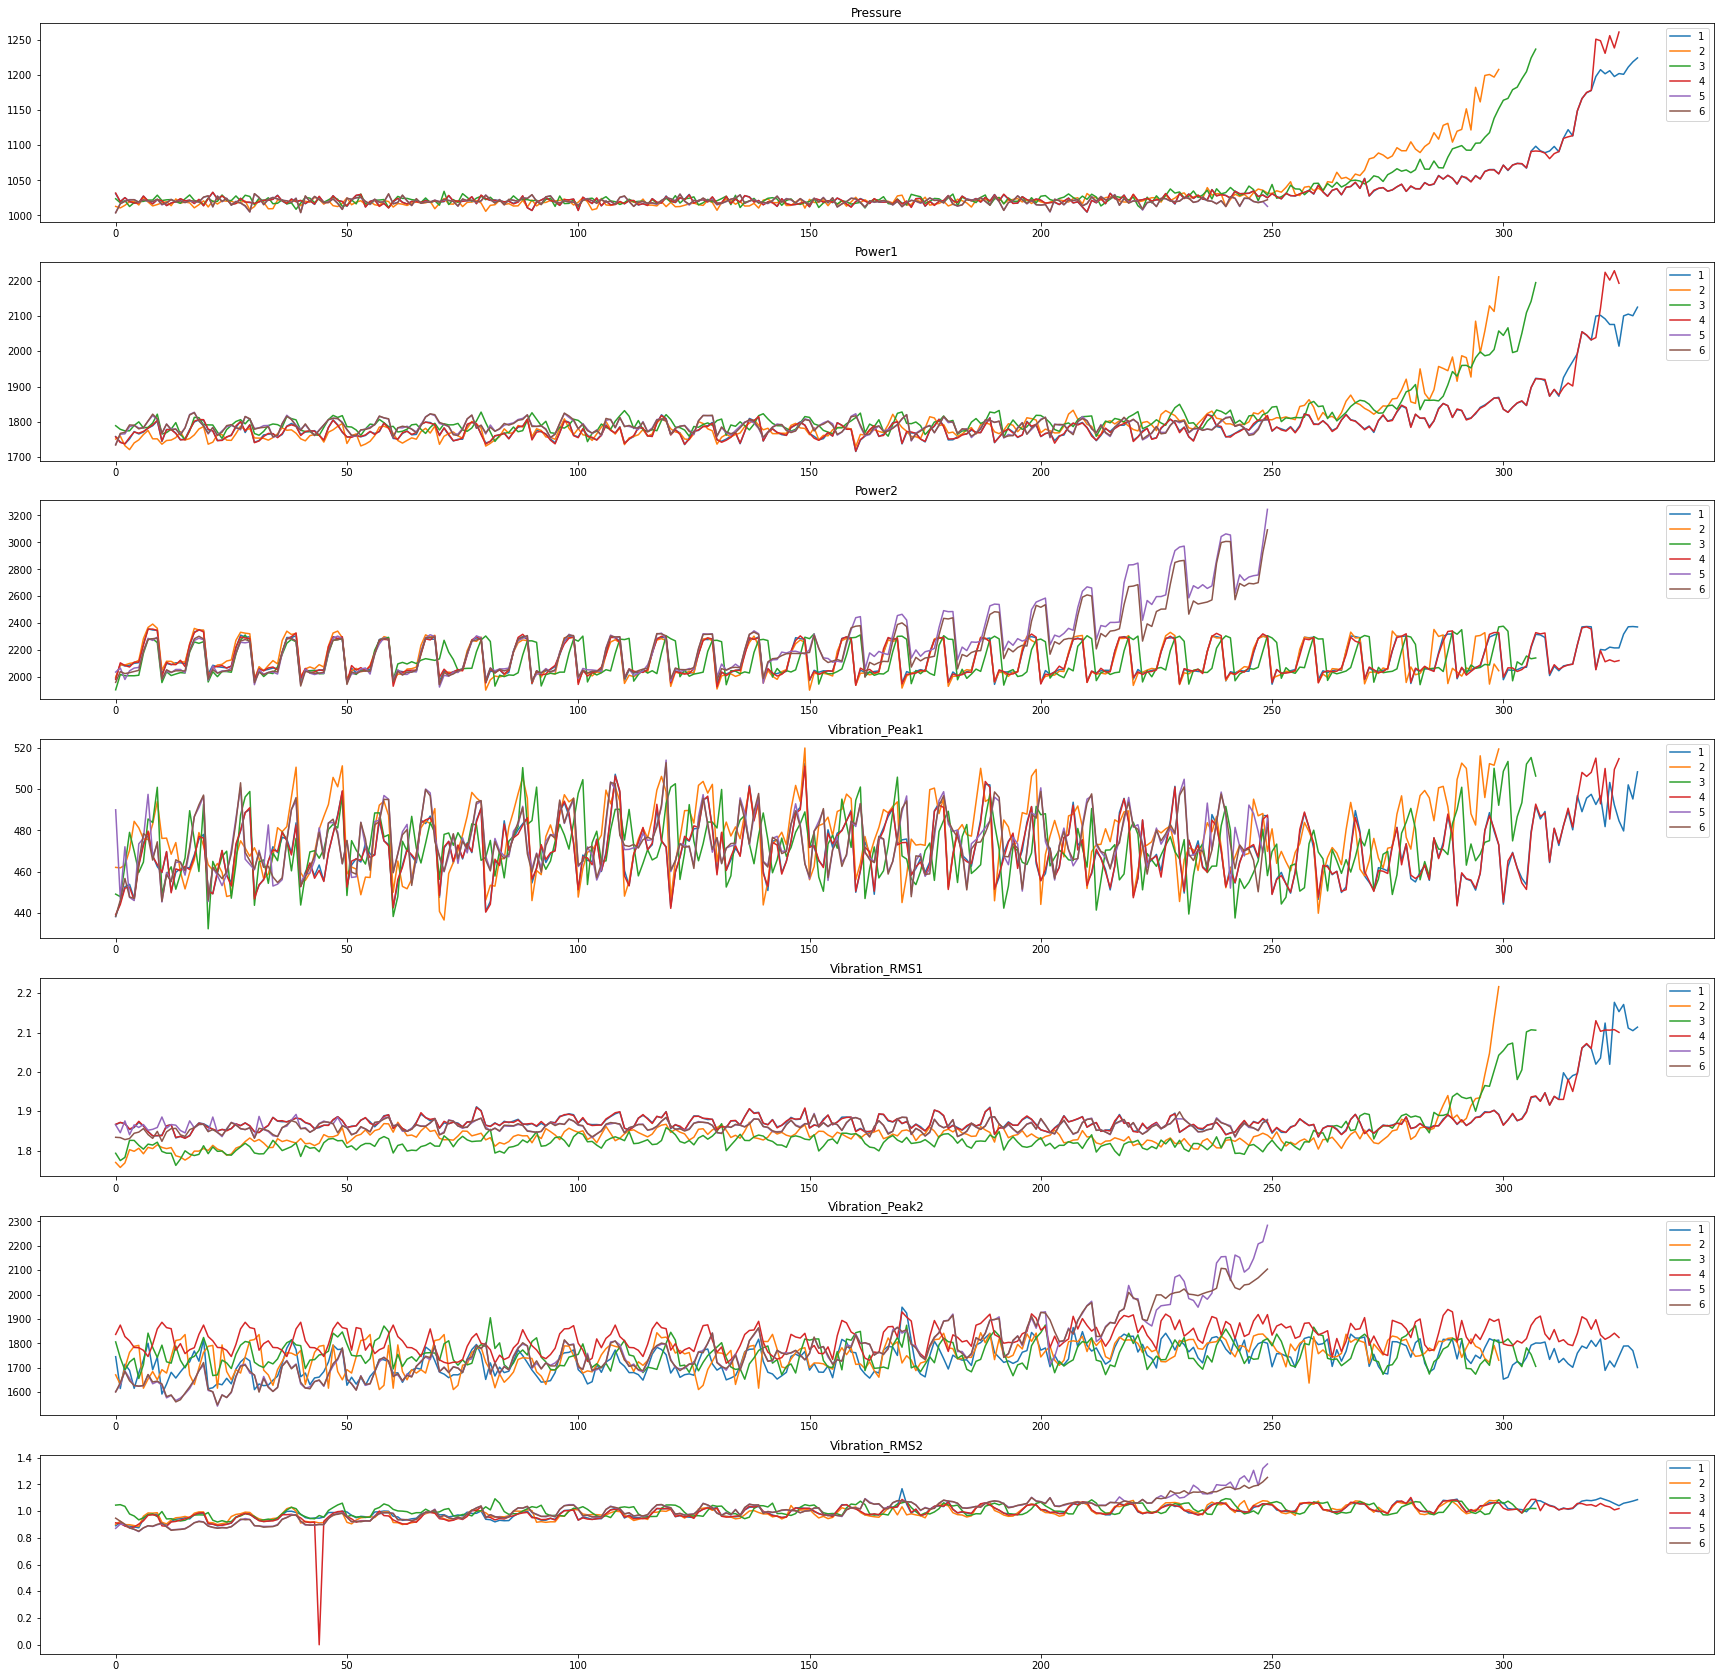

In [10]:
fig= plt.figure(figsize= (30, 30))
a= []
i=0
for y in range(7):
    a.append(fig.add_subplot(7, 1, y+1))

#key 1~4까지 합쳐서 비교
for col in data.columns:
    if col=='key':
        continue
    for num in range(1,len(data['key'].unique())+1):
        reIndex_data= data[data['key']==num]
        reIndex_data.reset_index(inplace=True)
        reIndex_data.drop(['index', 'key'], axis=1, inplace=True)
        
        
        a[i].plot(reIndex_data.index, reIndex_data[col],label=num)
    title= col
    a[i].set_title(title)
    a[i].legend()
    i+=1

In [11]:
sum1 = 0
total = 0
for i in range(len(data)) :
  total += 1
  sum1 += 1
  if (i == len(data) - 1) :
    print(str(int(data.iloc[i]['key'])) + '값의 개수 : ' + str(sum1))
    print('전체 데이터셋 행개수 : ' + str(total))
    break
  else :
    if (data.iloc[i]['key'] == data.iloc[i + 1]['key']) :
      continue
    else :
      print(str(int(data.iloc[i]['key'])) + '값의 개수 : ' + str(sum1))
      sum1 = 0

1값의 개수 : 330
2값의 개수 : 300
3값의 개수 : 308
4값의 개수 : 326
5값의 개수 : 250
6값의 개수 : 250
전체 데이터셋 행개수 : 1764


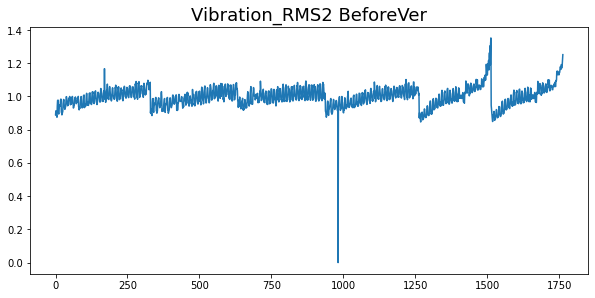

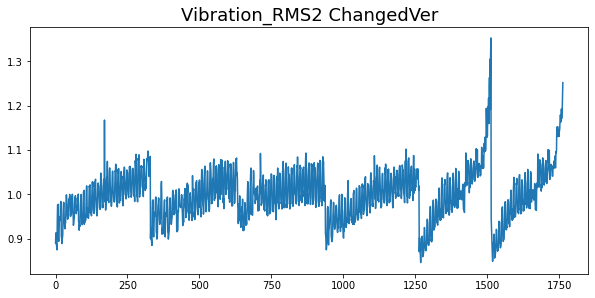

In [12]:
for i in range(2) :
    plt.subplot(2, 1,i+1)
    if i == 0 :
      plt.plot(data['Vibration_RMS2'])
      title= ''.join(['Vibration_RMS2', ' BeforeVer'])
    else :
      plt.plot(preprocessed_data['Vibration_RMS2'])
      title= ''.join(['Vibration_RMS2',' ChangedVer'])
    plt.title(title,fontdict={'fontsize' : 18})
    plt.show()